# Import libary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•

In [2]:
stock_symbol = "TRUE.BK"
df2 = yf.download(stock_symbol, start="2015-01-01", end="2023-03-11")
df2

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker        TRUE.BK    TRUE.BK    TRUE.BK    TRUE.BK    TRUE.BK
Date                                                             
2015-01-05  10.324483  10.324483   9.965370   9.965370  107423540
2015-01-06  10.414260  10.414260  10.055147  10.144926  166981405
2015-01-07  10.414260  10.504038  10.144926  10.414260  137311940
2015-01-08  10.234705  10.504038  10.144926  10.414260  132838328
2015-01-09  10.773374  10.863151  10.234705  10.324482  314248263
...               ...        ...        ...        ...        ...
2023-03-03   8.600000   8.800000   8.050000   8.350000  784877200
2023-03-07   8.400000   9.000000   8.200000   8.700000  827033400
2023-03-08   8.450000   8.550000   8.250000   8.350000  157405500
2023-03-09   8.350000   8.500000   8.200000   8.500000  104054300
2023-03-10   8.150000   8.350000   8.050000   8.250000   91504300

[1992 rows x 5 columns]

# ‡∏•‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏ß‡πà‡∏≤‡∏á

In [3]:
df2 = df2.drop(df2.index[[0, 1]])
df2.head()

Price           Close       High        Low       Open     Volume
Ticker        TRUE.BK    TRUE.BK    TRUE.BK    TRUE.BK    TRUE.BK
Date                                                             
2015-01-07  10.414260  10.504038  10.144926  10.414260  137311940
2015-01-08  10.234705  10.504038  10.144926  10.414260  132838328
2015-01-09  10.773374  10.863151  10.234705  10.324482  314248263
2015-01-12  11.042707  11.132486  10.683595  10.863151  181938141
2015-01-13  11.042707  11.312042  10.863151  10.952929  262962850

# ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏´‡∏≤‡∏¢‡πÑ‡∏õ DataFrame

In [4]:
print("Missing Values:\n", df2.isnull().sum())

Missing Values:
 Price   Ticker 
Close   TRUE.BK    0
High    TRUE.BK    0
Low     TRUE.BK    0
Open    TRUE.BK    0
Volume  TRUE.BK    0
dtype: int64


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1990 entries, 2015-01-07 to 2023-03-10
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, TRUE.BK)   1990 non-null   float64
 1   (High, TRUE.BK)    1990 non-null   float64
 2   (Low, TRUE.BK)     1990 non-null   float64
 3   (Open, TRUE.BK)    1990 non-null   float64
 4   (Volume, TRUE.BK)  1990 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 93.3 KB


In [6]:
df2.describe()

Price         Close         High          Low         Open        Volume
Ticker      TRUE.BK      TRUE.BK      TRUE.BK      TRUE.BK       TRUE.BK
count   1990.000000  1990.000000  1990.000000  1990.000000  1.990000e+03
mean       5.553101     5.638919     5.479095     5.563397  1.400534e+08
std        2.098185     2.134580     2.067648     2.106692  1.523727e+08
min        2.355449     2.490597     1.930696     2.220300  0.000000e+00
25%        4.389687     4.452692     4.320000     4.380000  5.573742e+07
50%        5.180404     5.247218     5.107624     5.198830  9.387630e+07
75%        6.247717     6.338925     6.156510     6.252295  1.651037e+08
max       13.287160    13.466718    13.017827    13.376939  1.716474e+09

In [7]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü ‡πÄ‡πÄ‡∏™‡∏î‡∏á‡∏£‡∏≤‡∏Ñ‡∏≤‡∏õ‡∏¥‡∏î‡∏´‡∏∏‡πâ‡∏ô TRUE

[*********************100%***********************]  1 of 1 completed


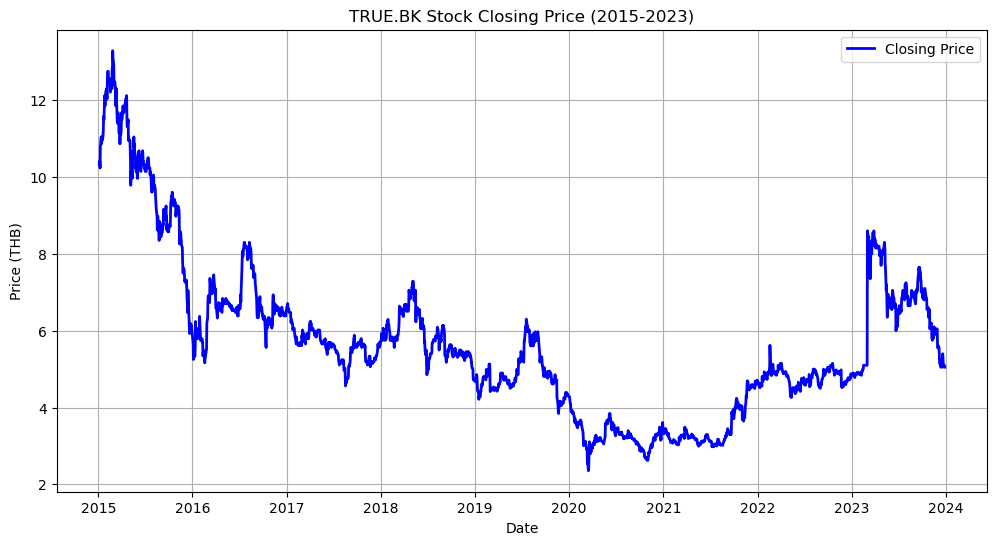

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt

# ‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏´‡∏∏‡πâ‡∏ô TRUE.BK ‡∏à‡∏≤‡∏Å Yahoo Finance
data = yf.download('TRUE.BK', start='2015-01-01', end='2023-12-31')

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Closing Price", linewidth=2, color='blue')

# ‡πÄ‡∏û‡∏¥‡πà‡∏° title ‡πÅ‡∏•‡∏∞ labels
plt.title("TRUE.BK Stock Closing Price (2015-2023)")
plt.xlabel("Date")
plt.ylabel("Price (THB)")
plt.legend()
plt.grid(True)

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.show()

In [9]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

# ‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÄ‡πÄ‡∏•‡∏∞‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡∏´‡∏∏‡πâ‡∏ô

[*********************100%***********************]  1 of 1 completed
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\EMEE\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 104ms/step
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step


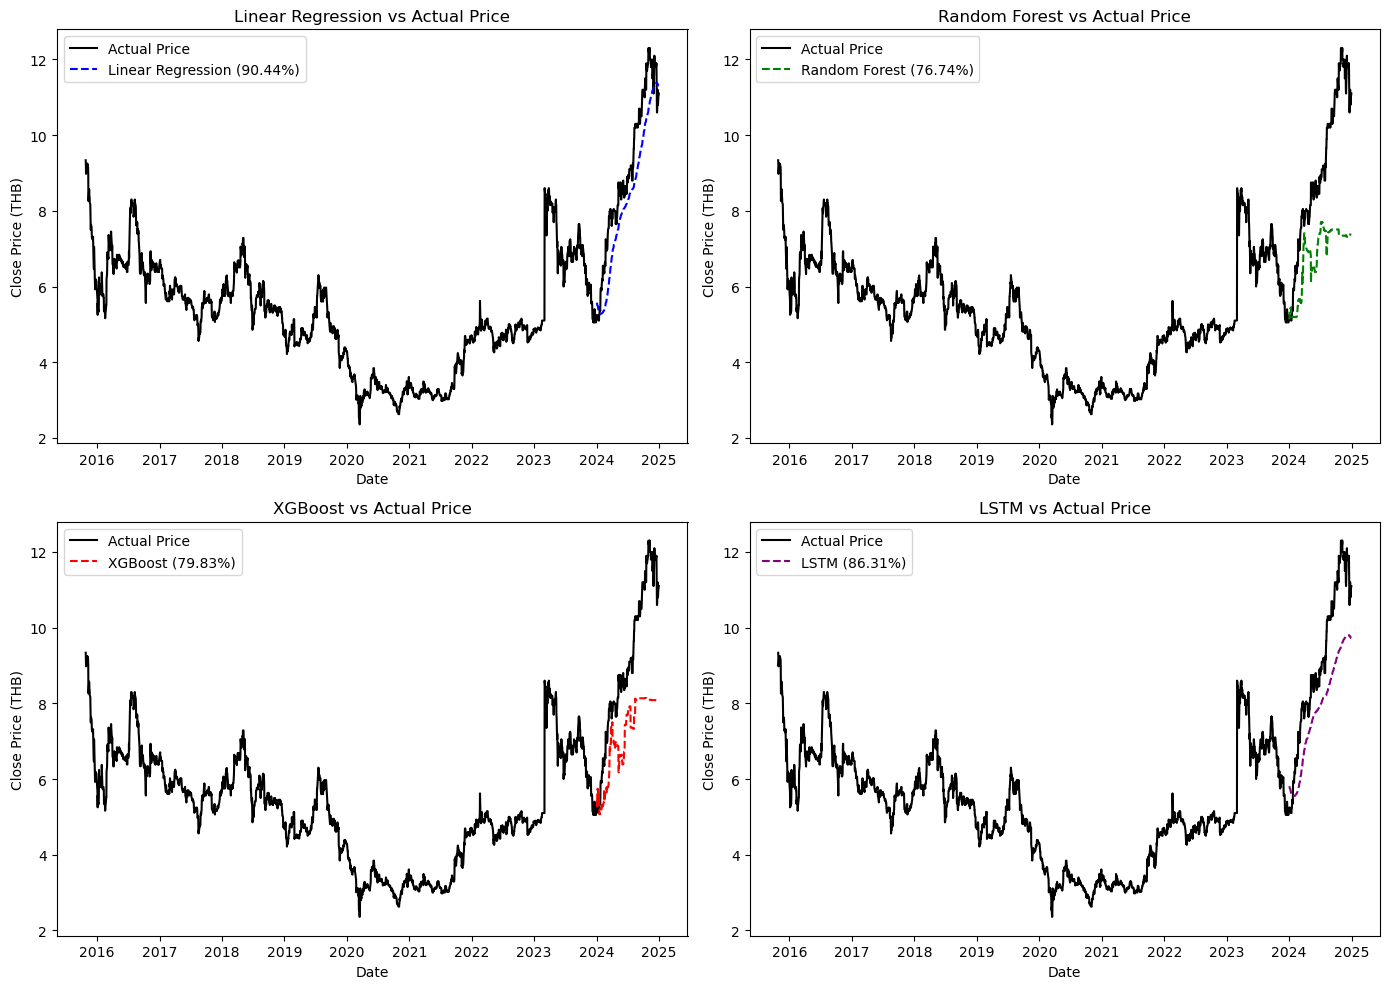

In [11]:
# ‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏´‡∏∏‡πâ‡∏ô ADVANC.BK (‡∏ñ‡∏∂‡∏á‡∏õ‡∏µ 2024)
ticker = "TRUE.BK"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
data = data[['Close']].dropna()

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå Moving Average
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)

# ‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• Train/Test
train = data[:'2023']  # ‡πÉ‡∏ä‡πâ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ñ‡∏∂‡∏á‡∏õ‡∏µ 2023 ‡πÄ‡∏õ‡πá‡∏ô Train Data
test = data.loc['2024']  # ‡πÉ‡∏ä‡πâ‡∏õ‡∏µ 2024 ‡πÄ‡∏õ‡πá‡∏ô Test Data ‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ .loc ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏õ‡∏µ 2024

X_train, y_train = train.drop(columns=['Close']), train['Close']
X_test, y_test = test.drop(columns=['Close']), test['Close']

# ---------- ‡πÄ‡∏ó‡∏£‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏• ----------
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=20, verbose=0)
y_pred_lstm = model.predict(X_test_lstm).flatten()

# ---------- ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥ (MAPE) ----------
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr) * 100
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm) * 100

confidence_scores = {
    "Linear Regression": 100 - mape_lr,
    "Random Forest": 100 - mape_rf,
    "XGBoost": 100 - mape_xgb,
    "LSTM": 100 - mape_lstm
}

# ---------- ‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå 2025-2026 ----------
future_dates = pd.date_range(start="2025-01-01", periods=730, freq='D')
future_features = X_train.iloc[-730:].values  # ‡πÉ‡∏ä‡πâ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏•‡πà‡∏≤‡∏™‡∏∏‡∏î

future_pred_lr = lr.predict(future_features)
future_pred_rf = rf.predict(future_features)
future_pred_xgb = xgb.predict(future_features)

future_features_lstm = np.array(future_features).reshape((future_features.shape[0], future_features.shape[1], 1))
future_pred_lstm = model.predict(future_features_lstm).flatten()

# ---------- ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü‡πÅ‡∏¢‡∏Å‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Å‡∏±‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏£‡∏¥‡∏á ----------
plt.figure(figsize=(14, 10))

# Linear Regression
plt.subplot(2, 2, 1)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_lr, label=f"Linear Regression ({confidence_scores['Linear Regression']:.2f}%)", linestyle="dashed", color="blue")
plt.title("Linear Regression vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# Random Forest
plt.subplot(2, 2, 2)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_rf, label=f"Random Forest ({confidence_scores['Random Forest']:.2f}%)", linestyle="dashed", color="green")
plt.title("Random Forest vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# XGBoost
plt.subplot(2, 2, 3)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_xgb, label=f"XGBoost ({confidence_scores['XGBoost']:.2f}%)", linestyle="dashed", color="red")
plt.title("XGBoost vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# LSTM
plt.subplot(2, 2, 4)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_lstm, label=f"LSTM ({confidence_scores['LSTM']:.2f}%)", linestyle="dashed", color="purple")
plt.title("LSTM vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
print("\nüìä Confidence Score (% ‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥‡∏à‡∏≤‡∏Å‡∏õ‡∏µ 2024):")
for model, acc in confidence_scores.items():
    print(f"{model}: {acc:.2f}%")


üìä Confidence Score (% ‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥‡∏à‡∏≤‡∏Å‡∏õ‡∏µ 2024):
Linear Regression: 90.44%
Random Forest: 76.74%
XGBoost: 79.83%
LSTM: 86.31%
